In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
 

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is a 5 Categorical and 3 Numerical Features 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no null valuwe in the dataset 

In [7]:
df.columns 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.shape

(1000, 8)

In [9]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [10]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [11]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [12]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [13]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

C:\Users\sarthak mandavkar\AppData\Local\Temp\ipykernel_20264\1690301534.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['gender'], palette='muted')


<Axes: xlabel='count', ylabel='gender'>

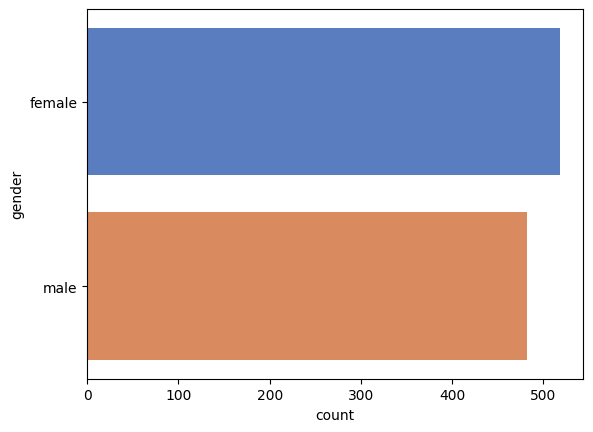

In [14]:
sns.countplot(y=df['gender'], palette='muted')

In [16]:
print("Categories in 'gender' variable:    ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ", end=" ")
print(df['test preparation course'].unique())



Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [18]:
## Define the numerical and categorical columns 
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print Column 
print ('We have {} numerical feature : {}'.format(len(numeric_feature), numeric_feature))
print ('We have {} categorical feature : {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical feature : ['math score', 'reading score', 'writing score']
We have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [20]:
df['Total score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total score'] / 3

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df['reading score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()

print(f"The Number of students with full marks in Reading : {reading_full}")
print(f"The Number of students with full marks in Maths: {math_full}")
print(f"The Number of students with full marks in Writing: {writing_full}")

The Number of students with full marks in Reading : 17
The Number of students with full marks in Maths: 7
The Number of students with full marks in Writing: 14


In [25]:
reading_score_less_than_20 = df[df['reading score'] <= 20]['Average'].count()
math_score_less_than_20 = df[df['math score'] <= 20]['Average'].count()
writing_score_less_than_20 = df[df['writing score'] <=20]['Average'].count()

print(f"The Number of students with less than 20 marks in Maths: {math_score_less_than_20}")
print(f'The Number of students with less than 20 marks in Reading: {reading_score_less_than_20}')
print(f"The Number of students with less than 20 marks in Writing: {writing_score_less_than_20}")

The Number of students with less than 20 marks in Maths: 4
The Number of students with less than 20 marks in Reading: 1
The Number of students with less than 20 marks in Writing: 3


In [27]:
fail_in_maths = df[df['math score'] < 20]['Average'].count()
fail_in_reading = df[df['reading score'] < 20]['Average'].count()
fail_in_writing = df[df['writing score'] < 20]['Average'].count()

print(f"The Number of students which are fail in Maths: {fail_in_maths}")
print(f"The Number of students which are fail in Reading: {fail_in_reading}")
print(f"The Number of students which are fail in Writing: {fail_in_writing}")

The Number of students which are fail in Maths: 4
The Number of students which are fail in Reading: 1
The Number of students which are fail in Writing: 3


1. As we are seen in above data that , there are maximum students which are fail in Math. 
2. Only one student is fail in Reading.
3. And 3 students are fail in Writing.


<function matplotlib.pyplot.show(close=None, block=None)>

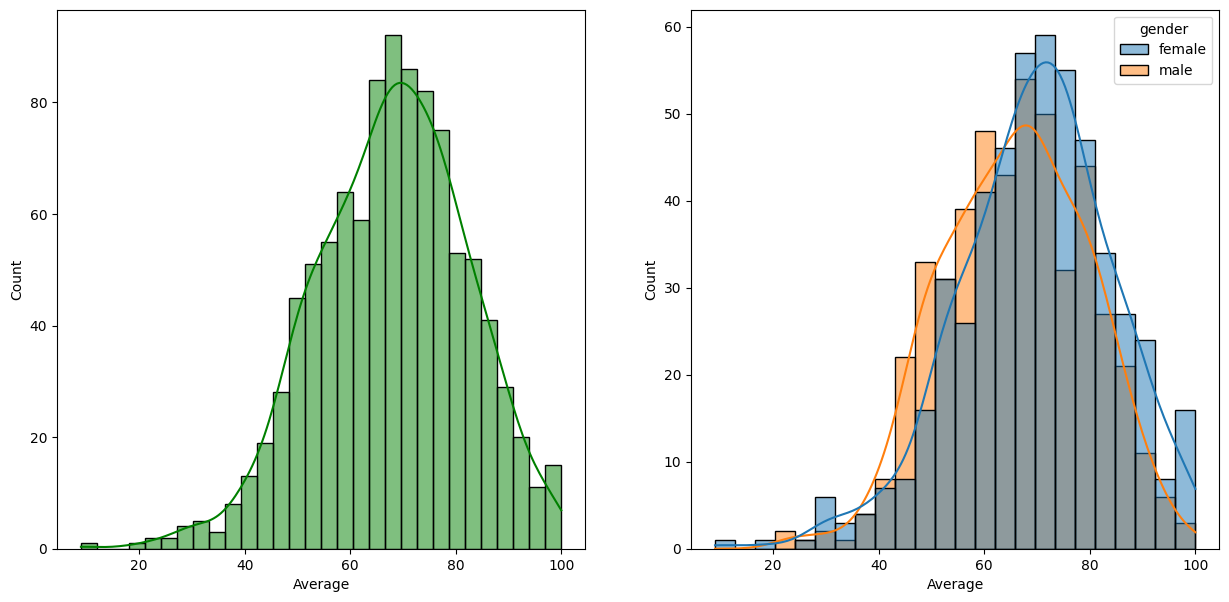

In [28]:
fig , axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show

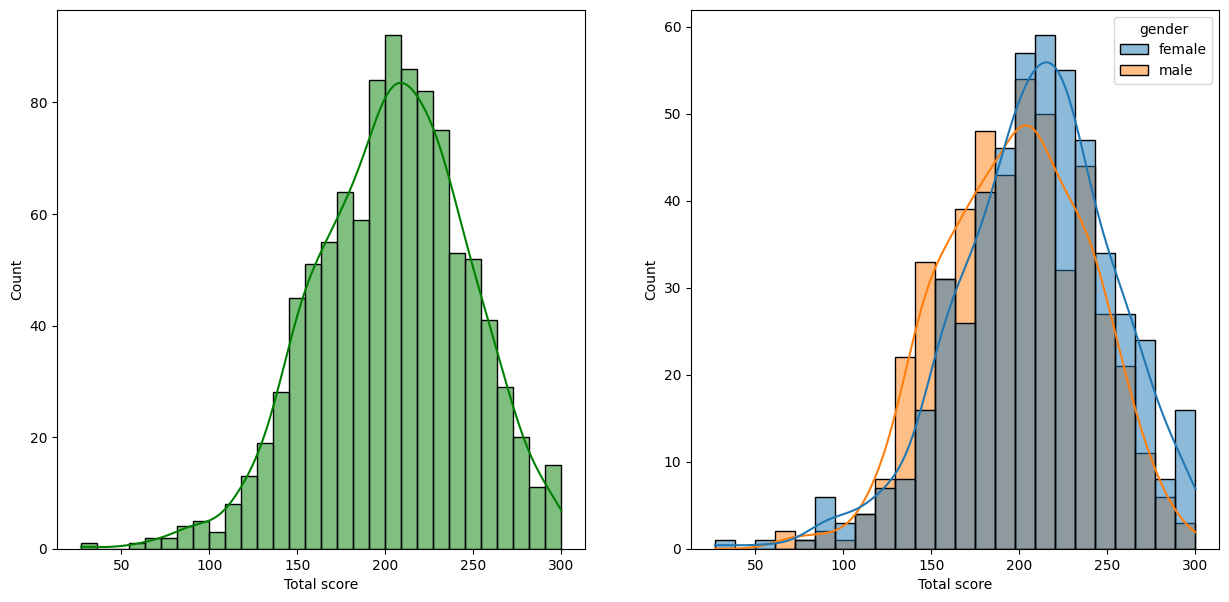

In [29]:
fig , axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total score', kde=True, hue='gender')
plt.show()

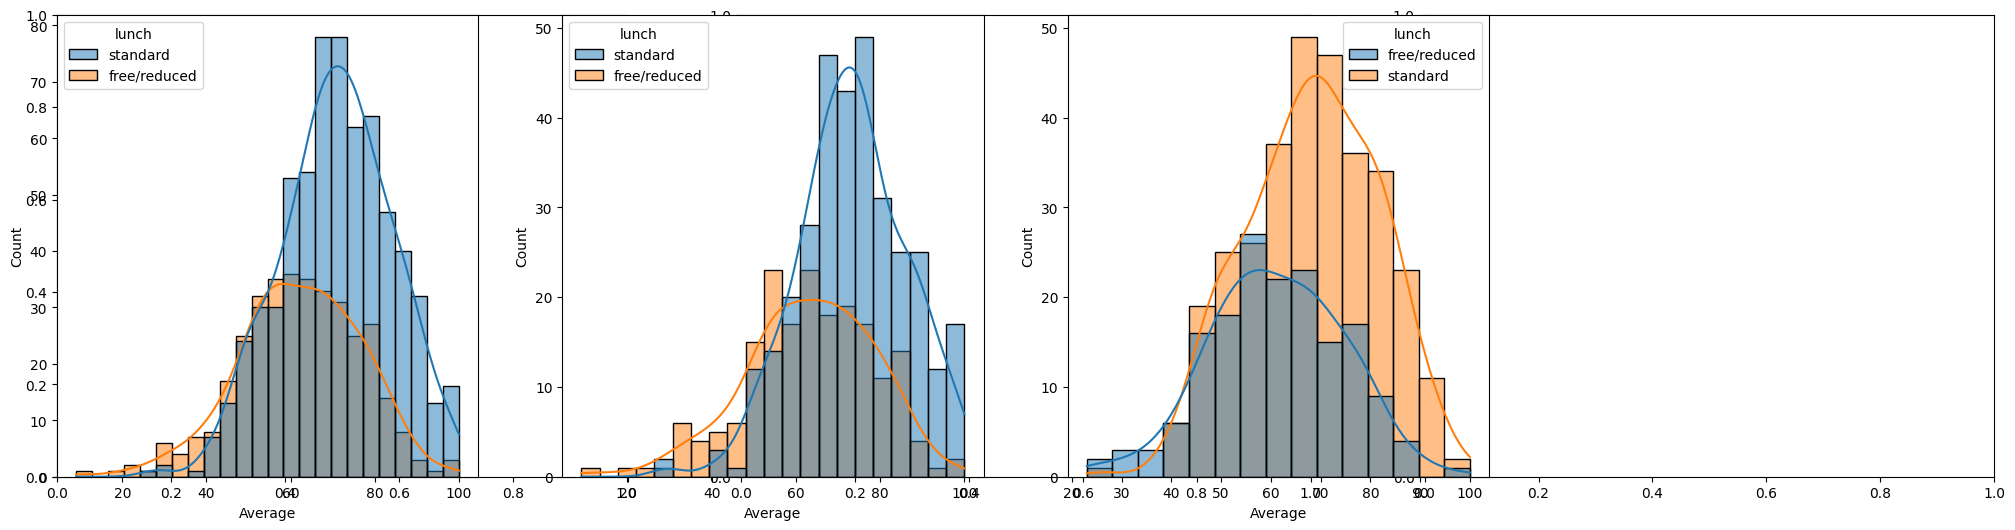

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='lunch')
plt.show()

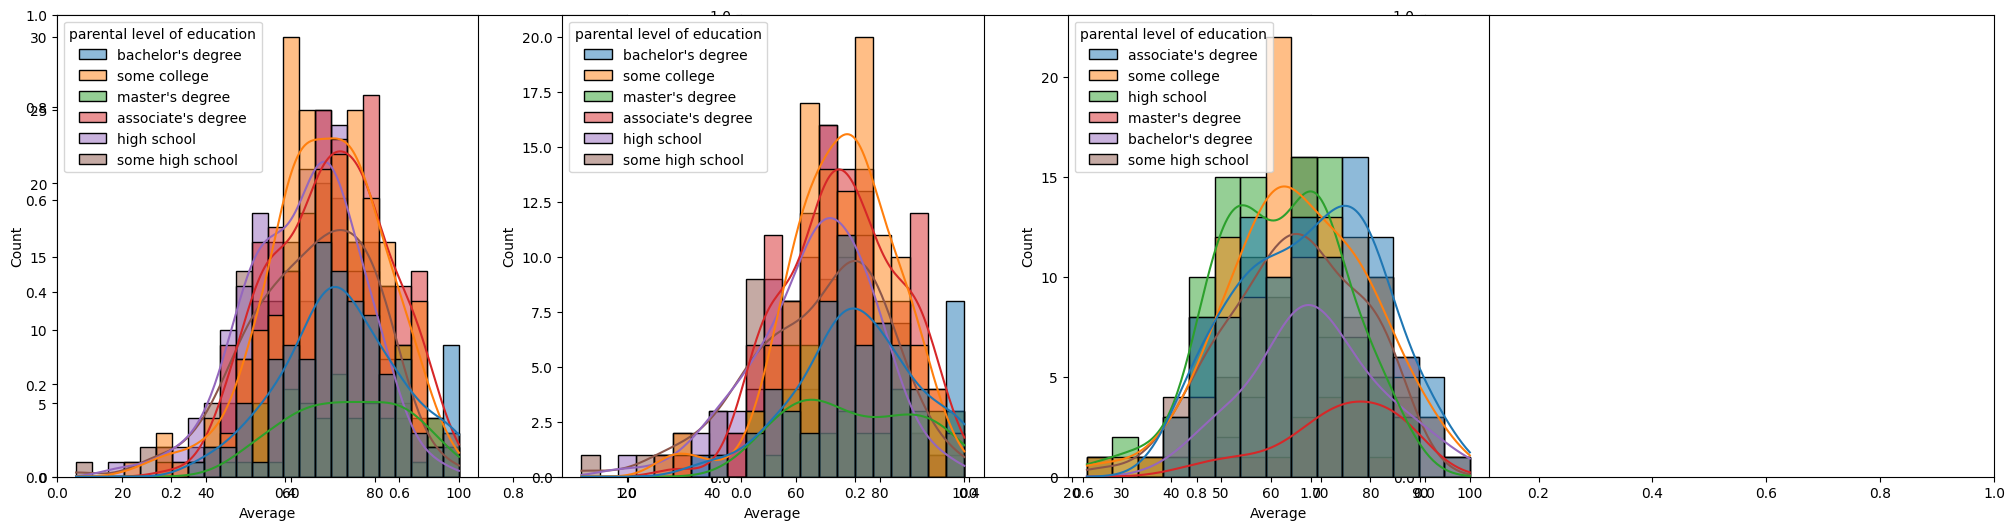

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='parental level of education')
plt.show()


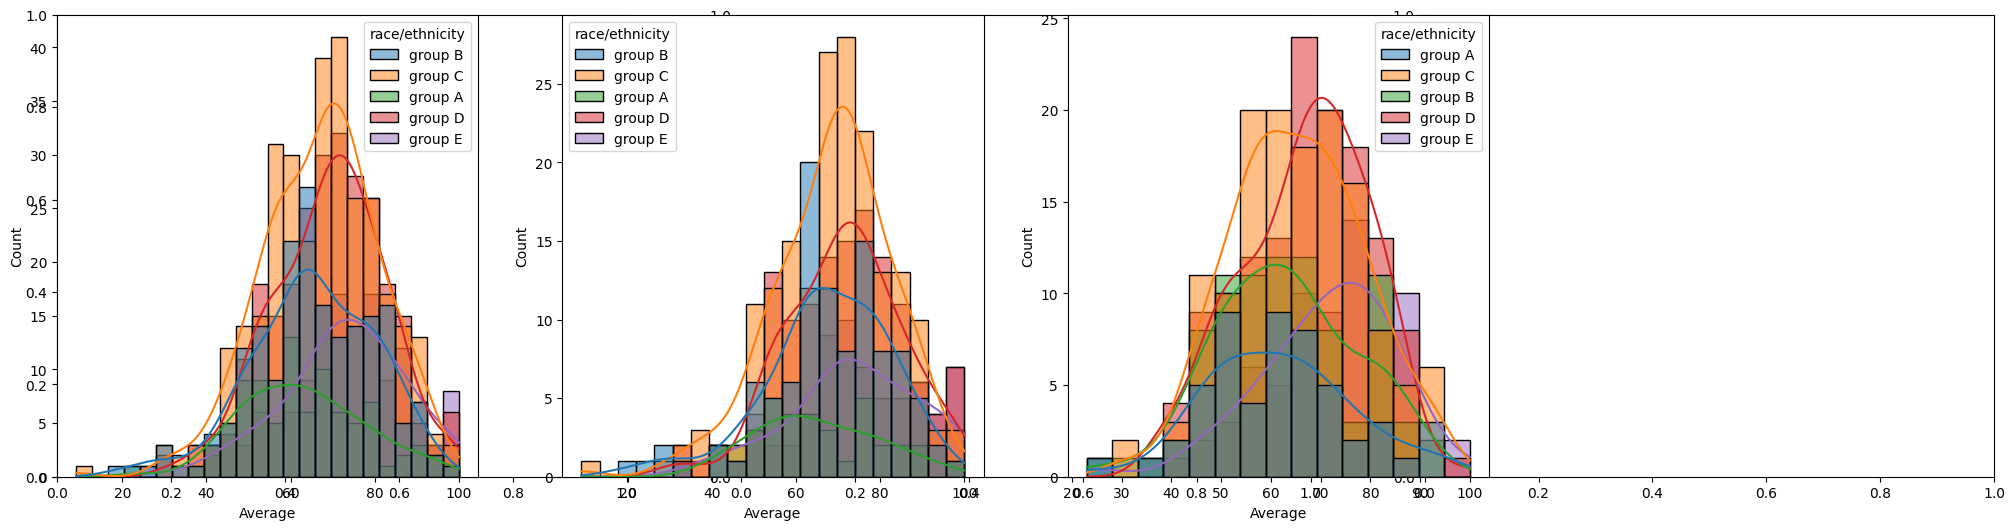

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='race/ethnicity')
plt.show()


<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing score'>

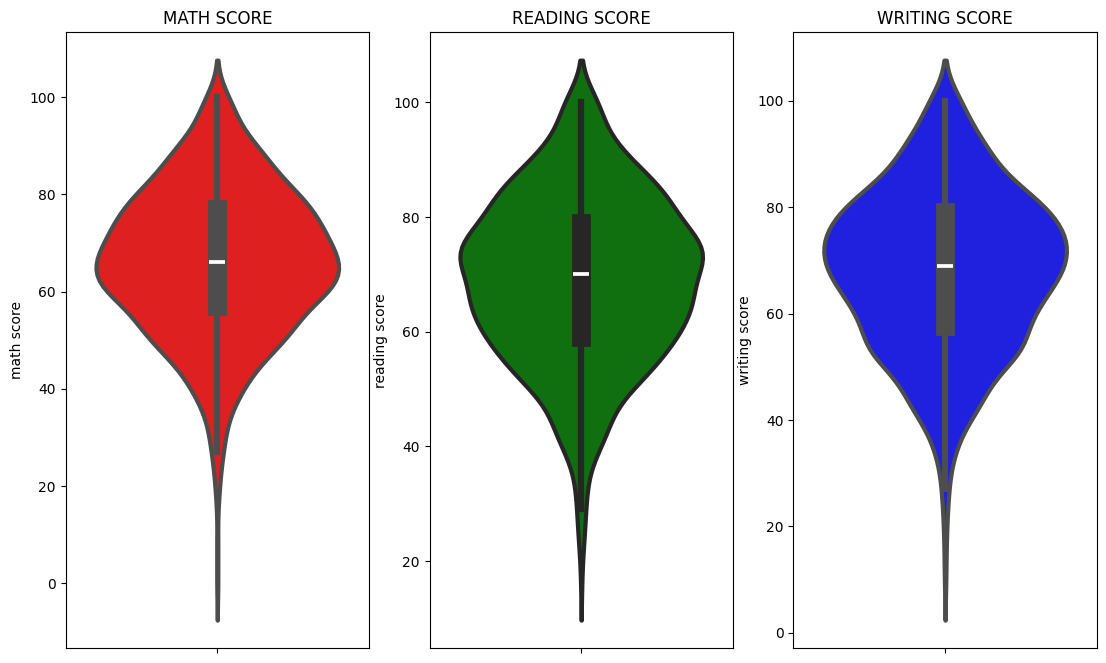

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORE')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORE')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
